In [1]:
!mc cp -r s3/cthiounn2/Rania/Accords/chroma_db_article .

]11;?\mc: Configuration written to `/home/onyxia/.mc/config.json`. Please update your access credentials.
mc: Successfully created `/home/onyxia/.mc/share`.
mc: Initialized share uploads `/home/onyxia/.mc/share/uploads.json` file.
mc: Initialized share downloads `/home/onyxia/.mc/share/downloads.json` file.
...ma.sqlite3: 347.60 MiB / 347.60 MiB ┃▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓┃ 78.23 MiB/s 4s

In [2]:
!uv pip install -q langchain==0.2.16 matplotlib langchain-community==0.2.16 langchain-huggingface==0.0.3 langchain-text-splitters==0.2.4 chromadb==0.5.3 langchain-chroma==0.1.3 pandas ipywidgets

In [3]:
!uv pip install -q pyarrow

In [4]:
!uv pip install -q seaborn

In [5]:
!uv pip install -q unidecode

In [6]:
import pandas as pd
from langchain_huggingface import HuggingFaceEmbeddings
from langchain.vectorstores import Chroma
from langchain_chroma import Chroma
from langchain.embeddings import OpenAIEmbeddings, OllamaEmbeddings
from langchain.document_loaders import TextLoader
from langchain.schema import Document, Generation, LLMResult
from langchain.llms import Ollama, BaseLLM
from langchain.chains import StuffDocumentsChain, RetrievalQA, LLMChain
from langchain_core.prompts import PromptTemplate
from langchain_community.llms import OpenAI
from langchain_text_splitters import CharacterTextSplitter
from langchain.chains import create_retrieval_chain
from langchain.chains.combine_documents import create_stuff_documents_chain
from langchain_core.prompts import ChatPromptTemplate
from pathlib import Path
import json
import requests
import re

In [7]:
import unidecode


In [8]:
from glob import glob

# Utils

In [9]:
class LocalOllamaLLM(BaseLLM):
    api_url : str
    def _generate(self, prompt, stop):
        response = requests.post(f"{self.api_url}/api/generate", json={"model": "llama3.1", "prompt": str(prompt)})
        response.raise_for_status()
        response_text=''.join([json.loads(line)['response'] for line in response.text.splitlines()])
        generations=[]
        generations.append([Generation(text=response_text)])
        return LLMResult(generations=generations)


    def _llm_type(self):
        return "local"  # Or whatever type is appropriate for your local setup

llm = LocalOllamaLLM(api_url="http://127.0.0.1:11434")

embedder = HuggingFaceEmbeddings(model_name="BAAI/bge-m3")


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/123 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/54.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/687 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.27G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.27G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/444 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/964 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/191 [00:00<?, ?B/s]

In [10]:
vector_store = Chroma(embedding_function=embedder,persist_directory="./chroma_db_article")

Failed to send telemetry event ClientStartEvent: capture() takes 1 positional argument but 3 were given
Failed to send telemetry event ClientCreateCollectionEvent: capture() takes 1 positional argument but 3 were given


In [11]:
vector_store.embeddings

HuggingFaceEmbeddings(client=SentenceTransformer(
  (0): Transformer({'max_seq_length': 8192, 'do_lower_case': False, 'architecture': 'XLMRobertaModel'})
  (1): Pooling({'word_embedding_dimension': 1024, 'pooling_mode_cls_token': True, 'pooling_mode_mean_tokens': False, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False, 'pooling_mode_weightedmean_tokens': False, 'pooling_mode_lasttoken': False, 'include_prompt': True})
  (2): Normalize()
), model_name='BAAI/bge-m3', cache_folder=None, model_kwargs={}, encode_kwargs={}, multi_process=False, show_progress=False)

In [12]:
!sudo apt update && sudo apt install --yes lshw

Get:1 http://security.ubuntu.com/ubuntu noble-security InRelease [126 kB]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2404/x86_64  InRelease [1,581 B]
Get:3 http://archive.ubuntu.com/ubuntu noble InRelease [256 kB]                
Get:4 https://ppa.launchpadcontent.net/git-core/ppa/ubuntu noble InRelease [24.3 kB]
Get:5 http://security.ubuntu.com/ubuntu noble-security/main amd64 Packages [1,326 kB]
Get:6 http://archive.ubuntu.com/ubuntu noble-updates InRelease [126 kB]
Ign:7 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu noble InRelease    
Get:8 http://archive.ubuntu.com/ubuntu noble-backports InRelease [126 kB]
Err:9 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu noble Release      
  404  Not Found [IP: 185.125.190.80 443]
Get:10 http://security.ubuntu.com/ubuntu noble-security/multiverse amd64 Packages [23.0 kB]
Get:11 http://security.ubuntu.com/ubuntu noble-security/universe amd64 Packages [1,134 kB]
Get:12 https://developer.download.nvidia.c

In [13]:
!curl -fsSL https://ollama.com/install.sh | sh

>>> Installing ollama to /usr/local
>>> Downloading Linux amd64 bundle
######################################################################### 100.0%
>>> Creating ollama user...
>>> Adding ollama user to video group...
>>> Adding current user to ollama group...
>>> Creating ollama systemd service...
>>> The Ollama API is now available at 127.0.0.1:11434.
>>> Install complete. Run "ollama" from the command line.


In [29]:
def create_question_answer_chain(system_prompt) :
    prompt = ChatPromptTemplate.from_messages(
        [
            ("system", system_prompt),
            ("human", "{input}"),
        ]
    )
    question_answer_chain= create_stuff_documents_chain(llm, prompt)
    return question_answer_chain


def search_and_invoke_llm(vector_store, numdossier, query, question_answer_chain, k=5):
    if k == 0:
        print(f"Échec de la recherche pour le dossier {numdossier}")
        return None

    try:
        retriever = vector_store.as_retriever(
            search_kwargs={
                "k": k,
                "filter": {"numdossier": str(numdossier)}
            }
        )
        
        retrieved_docs = retriever.invoke(query)
        chain = create_retrieval_chain(retriever, question_answer_chain)
        result = chain.invoke({"input": query})

        return {
            "answer": result.get("answer", ""),
            "context": [doc.page_content for doc in retrieved_docs]
        }

    except Exception as e:
        print(f"Erreur avec k={k}, tentative avec k={k-1} pour dossier {numdossier} : {e}")
        return search_and_invoke_llm(vector_store, numdossier, query, question_answer_chain, k=k-1)
        
def run_results(df, results_path, system_prompt, Q, k): 
    Path(results_path).mkdir(exist_ok=True)
    already_done = {el.split("/")[1].split(".")[0] for el in glob(f"{results_path}/*.json")}
    question_answer_chain = create_question_answer_chain(system_prompt)
    
    for index, row in df.iterrows():
        if str(index) not in already_done:
            numdossier = str(index)
            result_json = {
                "numdossier": numdossier,
                "responses": {},
                "context": {}
            }
            result = search_and_invoke_llm(vector_store, numdossier, Q, question_answer_chain, k)

            if result:
                result_json["responses"][Q] = result.get("answer", "")
                result_json["context"][Q] = result.get("context", [])
            else:
                result_json["responses"][Q] = None
                result_json["context"][Q] = []

            with open(f"{results_path}/{numdossier}.json", "w", encoding="utf-8") as f:
                json.dump(result_json, f, indent=2, ensure_ascii=False)


In [33]:
def save_contingent_as_csv(results_path, csv_path) :
    json_folder = results_path
    rows = []
    
    # regex
    contingent_pattern = re.compile(r'"variable"\s*:\s*(\d+|null)') #attention ici il faut forcement adapter suivanrt la sortie demandée dans prmpt 
    
    for filepath in glob(f"{json_folder}/*.json"):
        with open(filepath, "r", encoding="utf-8") as f:
            data = json.load(f)
            num_dossier = data.get("numdossier")
    
            # Récupération de la réponse brute
            response_text = data["responses"].get(
                "À combien est porté le contingent d’heures supplémentaires ? "
            )
    
            contingent = None  # valeur par défaut
    
            if response_text:
                response_text = response_text.strip("` \n")
                match = contingent_pattern.search(response_text)
                if match:
                    value = match.group(1)
                    contingent = int(value) if value.isdigit() else None
    
            rows.append({
                "numdossier": num_dossier,
                "contingent_annuel": contingent
            })
    
    # Création et export CSV
    df = pd.DataFrame(rows)
    df.to_csv(csv_path, index=False)


In [26]:
def run_all_pipeline(df, results_path, system_prompt, Q, k,csv_path): 
    run_results(df, results_path, system_prompt, Q, k)
    save_contingent_as_csv(results_path, csv_path)

# Visualiser les résultats 

In [17]:
df = pd.read_parquet("data/echantillon_1000_hs_2024_TOC.parquet")
df = df.rename(columns={"numdossier_new":"numdossier"})
df= df.set_index("numdossier")

In [18]:
df_test = df.iloc[1:10,:]

In [19]:
df_test

,accorddocx,txt_trim_list,extracted_summary
numdossier,,,
T03324062903,\t\t\n\t\nACCORD D’ENTREPRISE RELATIF A L’ORGA...,"[\t\t, \t, ACCORD D’ENTREPRISE RELATIF A L’ORG...",[ACCORD D’ENTREPRISE RELATIF A L’ORGANISATION ...
T07424060533,AVENANT N°2 DE L’ACCORD COLLECTIF D’ENTREPRISE...,[AVENANT N°2 DE L’ACCORD COLLECTIF D’ENTREPRIS...,[AVENANT N°2 DE L’ACCORD COLLECTIF D’ENTREPRIS...
T03224060321,\n\nACCORD D’ENTREPRISE SUR LES HEURES SUPPLEM...,"[, , ACCORD D’ENTREPRISE SUR LES HEURES SUPPLE...",[ACCORD D’ENTREPRISE SUR LES HEURES SUPPLEMENT...
T06724061948,\naccord d’entreprise \nrelatif au contingent ...,"[, accord d’entreprise , relatif au contingent...","[accord d’entreprise , relatif au contingent d..."
T03024060929,\nAccord d’entreprise sur le contingent d’heur...,"[, Accord d’entreprise sur le contingent d’heu...",[Accord d’entreprise sur le contingent d’heure...
T00624061495,\nACCORD D’ENTREPRISE RELATIF A LA DUREE DU TE...,"[, ACCORD D’ENTREPRISE RELATIF A LA DUREE DU T...",[ACCORD D’ENTREPRISE RELATIF A LA DUREE DU TEM...
T06924065628,\n\n\n\nACCORD D’ENTREPRISE\nREPOS COMPENSATEU...,"[, , , , ACCORD D’ENTREPRISE, REPOS COMPENSATE...","[ACCORD D’ENTREPRISE, REPOS COMPENSATEUR, PREA..."
T07424061214,Accord d’entreprise relatif aux heures supplém...,[Accord d’entreprise relatif aux heures supplé...,[Accord d’entreprise relatif aux heures supplé...
T06924062286,\nAccord d'entreprise\nrelatif au contingent a...,"[, Accord d'entreprise, relatif au contingent ...","[Accord d'entreprise, relatif au contingent an..."


In [20]:
system_prompt = (
    "Tu es un assistant intelligent chargé d'extraire des informations précises à partir d'un texte.\n\n"
    "Ta tâche est de répondre à la question suivante : « À combien est porté le contingent d’heures supplémentaires ? »\n\n"
    "Tu dois répondre uniquement par un JSON au format strict suivant :\n"
    "{{\n"
    '  "variable": <valeur numérique entière ou null>\n'
    "}}\n\n"
    "Ne produis aucun commentaire, explication ou texte hors du JSON. Ne formate pas différemment.\n\n"
    "Définitions utiles:\n"
    "- La *durée annuelle de travail de référence* est le nombre total d’heures de travail prévues sur une année pour un salarié (généralement autour de 1607 heures).\n"
    "- Le *contingent annuel d’heures supplémentaires* est le nombre total d’heures supplémentaires autorisées pour un salarié sur une année .\n\n"
    "Règles STRICTES :\n"
    "- Tu dois uniquement extraire une valeur **clairement mentionnée** dans le contexte.\n"
    "- N'invente jamais de valeur : si aucune valeur explicite n’est donnée dans le contexte, réponds avec `null`.\n"
    "- Ne fais jamais d’estimation ou d’interprétation basée sur des hypothèses ou du bon sens.\n"
    "- Si une valeur supérieure à 1000 est mentionnée, il est très probable qu’il s’agisse de la *durée annuelle de travail* et non du *contingent*. Dans ce cas, réponds `null` pour éviter toute confusion.\n"
    "- Ne confonds **jamais** la durée annuelle de travail et le contingent annuel d’heures supplémentaires.\n"
    "- Ignorer toute information concernant le CET.\n\n"       
    "Contexte : {context}\n"
    "Si aucun contexte n’est fourni, réponds avec `null`.\n"

)


In [21]:
Q1= "À combien est porté le contingent d’heures supplémentaires ? "

In [34]:
run_all_pipeline(df,"results_llama3.1_k=2", system_prompt, Q1,2,"contingent_annuel.csv")

In [64]:
results_llama3_1 = pd.read_csv("contingent_annuel.csv")
results_llama3_1= results_llama3_1.rename(columns={"contingent_annuel":"contingent"})
true_results= pd.read_csv("data/echantillon_eval_hs_2024_contingent_annote.csv")
true_results = true_results.rename(columns={"numdossier_new":"numdossier"})

In [65]:
results_llama3_1

,numdossier,contingent
0,T03324061585,329.0
1,T03024060799,NaN
2,T08524061462,200.0
3,T02924060761,220.0
4,T04924061047,500.0
...,...,...
995,T02624061216,NaN
996,T07524066935,NaN
997,T03424060904,NaN
998,T06424060577,NaN


In [67]:
true_results

,numdossier,contingent
0,T00724060165,NaN
1,T03324062903,400.0
2,T07424060533,NaN
3,T03224060321,NaN
4,T06724061948,360.0
...,...,...
95,T09224067019,NaN
96,T09224068199,NaN
97,T04524060557,220.0
98,T59L24063310,NaN


In [68]:
comparaison_df = pd.merge(
    results_llama3_1,
    true_results,
    on="numdossier",
    how="inner",
    suffixes=('_llm', '_annot')  
)
comparaison_df["contingent_llm"] = comparaison_df["contingent_llm"].fillna("")
comparaison_df["contingent_annot"] = comparaison_df["contingent_annot"].fillna("")

In [69]:
comparaison_df[comparaison_df["contingent_llm"] == comparaison_df["contingent_annot"]]

,numdossier,contingent_llm,contingent_annot
0,T03824062676,423.0,423.0
1,T05624061590,220.0,220.0
2,T06424061149,220.0,220.0
3,T03124062604,360.0,360.0
4,T00124060343,,
...,...,...,...
95,T05724060864,180.0,180.0
96,T07424061503,300.0,300.0
97,T05224060258,425.0,425.0
98,T05324060767,360.0,360.0


In [70]:
comparaison_df[comparaison_df["contingent_llm"] != comparaison_df["contingent_annot"]]

,numdossier,contingent_llm,contingent_annot
7,T09424060886,,250.0
35,T02524061095,72.0,
45,T07524067789,,100.0
68,T03324061515,400.0,500.0
71,T04524061125,420.0,


# Vérifier pour un exemple en particulier (vérifier le retrieval d'une erreure du modèle) 

In [55]:
from pprint import pprint

query = "À combien est fixé le contingent d’heures supplémentaires ?"
retriever = vector_store.as_retriever(search_kwargs={"k": 2, "filter": {"numdossier": "T06224061231"}})
results = retriever.invoke(query)

print("----- CONTEXTE RETOURNÉ -----")
for i, doc in enumerate(results):
    print(f"[{i}] {doc.metadata['id']}")
    print(doc.page_content)
    print("---")


----- CONTEXTE RETOURNÉ -----
[0] T06224061231_6
Détermination du contingent d’heures supplémentaires

Le présent accord a pour objet d’augmenter le contingent annuel d’heures supplémentaires, visé à l’article L. 3121-30 du Code du travail et de le fixer à 384 heures par année et par salarié.

La période de référence pour le calcul du contingent annuel est l’année civile, soit du 1er janvier au 31 décembre.

Ce contingent d’heures supplémentaires s’applique de plein droit à l’année civile au cours de laquelle le présent accord entre en vigueur, sans donner lieu à sa réduction prorata temporis.

De même, il s’applique intégralement, sans réduction prorota temporis, pour les salariés intégrant ou sortant de l’entreprise au cours de l’année civile, ou pour les salariés en contrat à durée déterminée n’étant pas présents sur toute la période de référence. Chaque salarié dispose ainsi, quelle que soit la date de son entrée ou de sa sortie dans l’entreprise, d’un contingent annuel de 384 heur

# Afficher la matrice de confusion

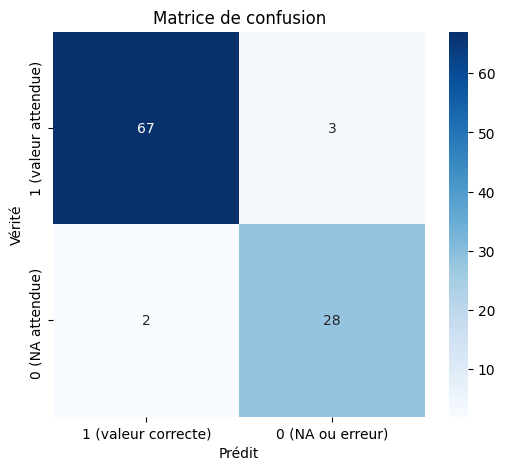

In [58]:
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


comparaison_df["contingent_annot"] = comparaison_df["contingent_annot"].replace("", np.nan)
comparaison_df["contingent_llm"] = comparaison_df["contingent_llm"].replace("", np.nan)
y_true = comparaison_df["contingent_annot"]
y_pred = comparaison_df["contingent_llm"]

#y_true : 0 = valeur, 1 = NA
y_true_etiquette = y_true.isna().astype(int)

#y_pred : 1 = NA ou valeur fausse, 0 = bonne valeur
y_pred_etiquette = []

for true_val, pred_val in zip(y_true, y_pred):
    if pd.isna(pred_val):
        y_pred_etiquette.append(1)  #prédit NA
    elif pd.isna(true_val):
        y_pred_etiquette.append(0)  #rien attendu, valeur prédite →on laisse comme 0(comme FP)
    elif pred_val != true_val:
        y_pred_etiquette.append(1)  #mauvaise valeur prédite →considéré comme NA (erreur)
    else:
        y_pred_etiquette.append(0)  #bonne prédiction

#Matrice de confusion
conf_matrix = confusion_matrix(y_true_etiquette, y_pred_etiquette, labels=[0, 1])
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=["1 (valeur correcte)", "0 (NA ou erreur)"],
            yticklabels=["1 (valeur attendue)", "0 (NA attendue) "])
plt.xlabel("Prédit")
plt.ylabel("Vérité")
plt.title("Matrice de confusion")
plt.show()


#Ajouter au df
comparaison_df["y_true_etiquette"] = y_true_etiquette
comparaison_df["y_pred_etiquette"] = y_pred_etiquette


In [57]:
print(classification_report(y_true_etiquette, y_pred_etiquette, target_names=["valeur", "NA"]))

              precision    recall  f1-score   support

      valeur       0.97      0.96      0.96        70
          NA       0.90      0.93      0.92        30

    accuracy                           0.95       100
   macro avg       0.94      0.95      0.94       100
weighted avg       0.95      0.95      0.95       100

